In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
#Write code to load the dataset here
df = pd.read_csv("Uber Request Data.csv")

In [3]:
#use the following few lines to explore the data or clean it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


## Q1. Null Values
Which columns have null values and how many?

a) Request id - 2650 Driver id - 3914

b) Request id-   3914 Driver id - 2650

$\color{green} {c)\,Driver\,id\,-\,2650\,Drop\,time\,stamp\,-\,3914}$

d) There are no null values in the dataset.

In [4]:
#We simply use isnull().sum() on whole df
print (df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


## Q2. Choose Correct

Select the correct statements from the options given below. (More than one may be correct)

a) We need to delete the records containing the null values as they won’t be useful for our analysis.

b) Only the records containing null values in the Driver id need to be eliminated.

$\color{green} {c)\,There\,are\,a\,total \,of \,1264\, requests \,which\, have\, a \,status\, of \, “cancelled”.}$

$\color{green} {d)\,We \,need \,to \,keep\, the\, records\, containing\, null \,values\, for \,both\, the\, columns\, and \,using\, them \,analyse \,the\, problems \,faced \,by\, Uber.}$

In [5]:
# value_counts() on Status
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

## Q3. Busy Hour

Now that you have understood the significance of the null values in this case study, the next step would involve fixing the Request Time-Stamp and Drop-Time Stamp columns. Go ahead and convert it into a date-time object. After that report back the hour in which the most number of requests are being made.

$\color{green} {a)\,18:00-19:00}$

b) 16:00-17:00

c) 14:00-15:00

d) 13:00-14:00

e) 19:00-20:00

In [6]:
#We first convert Request timestamp and Drop timestamp to datetime
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [7]:
#next we make a new column of request hour about what hour the request was made
df['Request hour']=df['Request timestamp'].apply(lambda x: x.hour)
#and then use value_counts() on this new column
df['Request hour'].value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request hour, dtype: int64

We note that __$18^{th}$__ hour has most requests 

## Q4. Cancelled Dates
Next, extract the date from the request timestamp and find the date when the most number of trips were cancelled.

$\color{green} {a)\,2016-07-13}$

b) 2016-11-07

c) 2016-07-14

d) 2016-07-15 

e) 2016-12-07

In [8]:
# We make a new column and extract dates from Request time stamp
df['Request date']=df['Request timestamp'].apply(lambda x: x.date())
#and now do a value counts() on Cancelled rides for Request date
df[df['Status']=='Cancelled']['Request date'].value_counts()

2016-07-13    270
2016-11-07    262
2016-07-14    252
2016-07-15    240
2016-12-07    240
Name: Request date, dtype: int64

We note that the date __2016-07-13__ has the highest number of cancelations

## Correct Statements II

Choose the correct statements from the ones given below.

(More than one may be correct)

$\color{green} {a)\,In\,general, \,the \,five \,hour \,time \,period \,in \,which\, the\, most\, number\, of \,trips\, are\, completed \,is\, approximately\, 5-10.}$

b) Across all the days, the number of trips from the City that get cancelled is nearly 9 times less than the trips when there were no cars available.

c) Across all the days, the number of trips from the Airport that get cancelled is comparable to the number of trips when there were no cars available.

$\color{green} {d)\,The\, number\, of \,trips \,getting\, completed \,from \,City\, is\, higher \,than\, the\, trips\, completed\, from\, the\, airport.}$


In [9]:
#Checking option (a)
Q5a=df[df['Status']=='Trip Completed']['Request hour'].value_counts().sort_index()
for i in range(24):
    Q5a[i]=sum(Q5a[i:i+5])
Q5a

0     214
1     359
2     501
3     638
4     759
5     854
6     785
7     733
8     680
9     614
10    529
11    515
12    491
13    521
14    596
15    674
16    733
17    784
18    787
19    726
20    560
21    399
22    257
23    103
Name: Request hour, dtype: int64

We see that the maximum Trips completed in 5 hour window is in 5-10 (854)

In [10]:
#for options b and c
#find the rides cancled from city
len(df[(df['Pickup point']=='City') & (df['Status']=='Cancelled')])


1066

In [11]:
#rides cancled from airport
len(df[(df['Pickup point']=='Airport') & (df['Status']=='Cancelled')])

198

In [12]:
#no cars available
len(df[(df['Status']=='No Cars Available')])

2650

We note that options b and c are not true

In [13]:
#check for option d
len(df[(df['Pickup point']=='City') & (df['Status']=='Trip Completed')])

1504

In [14]:
len(df[(df['Pickup point']=='Airport') & (df['Status']=='Trip Completed')])

1327

Hence trips completed from city are more than trips completed from airport

## Q6. Request Time

Once you’ve analysed requests for all the days at an aggregate level, it’s time to find patterns in individual days and see if there is anything common across the days. Analyse the distribution of requests across all the days and choose the correct option.

a) The most number of requests are obtained only in the morning hours across all the days.

b) The most number of requests are obtained only in the evening hours across all the days.

$\color{green} {c)\,The\, most \,number \,of \,requests\, are \,obtained\, both\, in\, the\, morning\, as\, well \,as\, the\, evening\, hours\, across\, all\, the\, days.}$

d) None of these

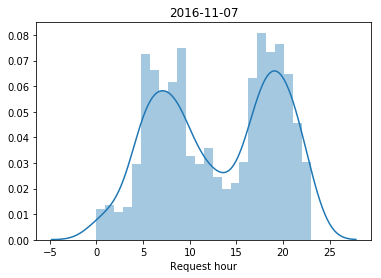

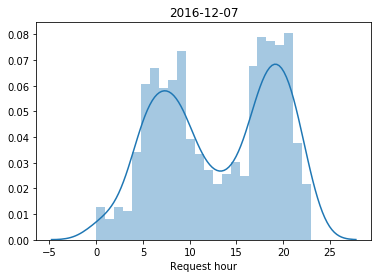

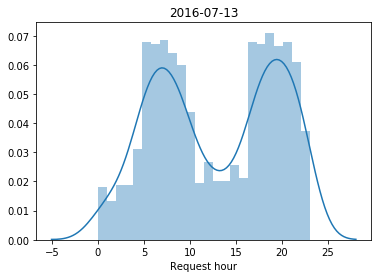

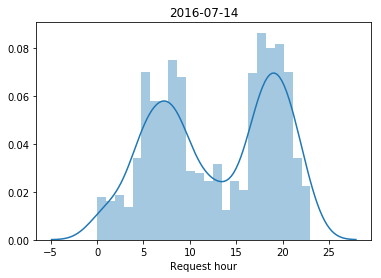

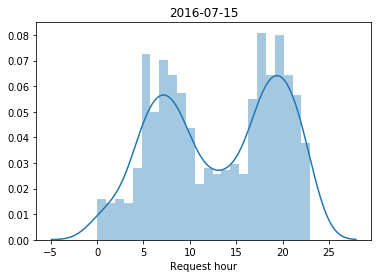

In [15]:
#best way to do this is to plot the histograms for all dates
#we first get the unique dates 
unique_dates=df['Request date'].unique()
#and now use a for loop to plot the histogram on 'Request hour'
for i in unique_dates:
    #we will use 24 bins, one bin for each hour
    sns.distplot(df[df["Request date"]==i]['Request hour'], bins=24)
    plt.title(str(i))
    plt.show()

Option __(c)__ is clearly the correct statement

## Q7. Request Time II

Now that you’ve observed that the number of requests across all the days is similar, you need to check it across the pick-up points as well. Analyse the distribution of requests across each of the pick-up points exclusively and choose the correct option:

a) The majority of requests from City are obtained during evening hours.

b) The majority of requests from Airport are obtained during morning hours.
 
$\color{green} {c)\,The\, majority \,of \,requests\, from \,City\, are \,obtained\, during\, morning \,hours.}$

d) Both a) and b)


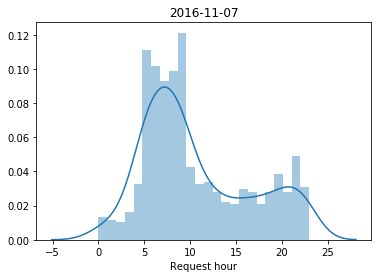

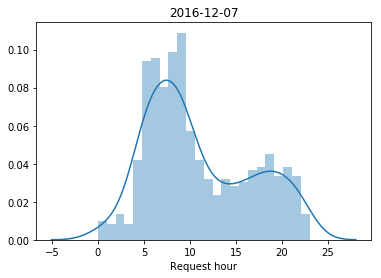

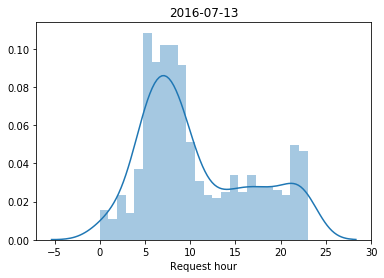

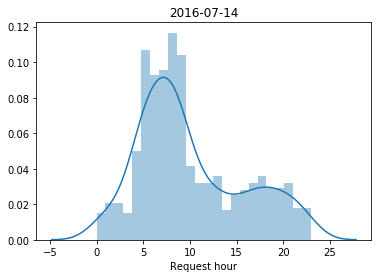

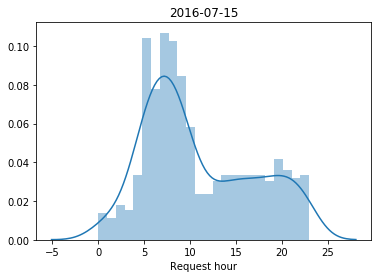

In [16]:
#just like previous question, we plot histogram for all dates
#this time we add another filter and divide it into two parts

# for city
for i in unique_dates:
    sns.distplot(df[(df["Request date"]==i) & (df['Pickup point']=='City')]['Request hour'], bins=24)
    plt.title(str(i))
    plt.show()

From above graphs we conclude that option __(a)__ is __false__ and option __(c)__ is __true__

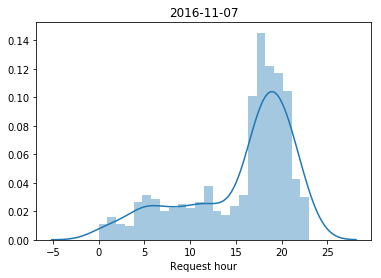

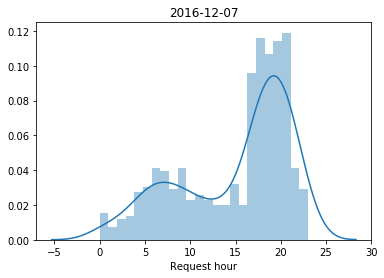

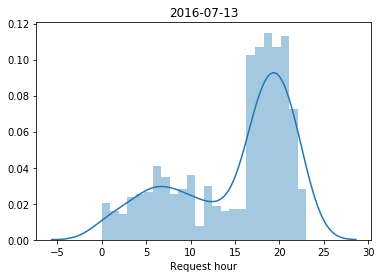

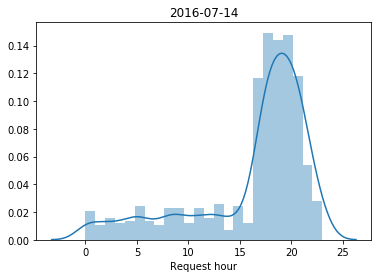

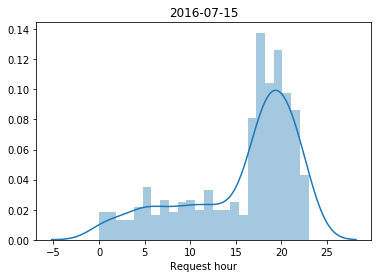

In [17]:
#for Airport pickups
for i in unique_dates:
    sns.distplot(df[(df["Request date"]==i) & (df['Pickup point']=='Airport')]['Request hour'], bins=24)
    plt.title(str(i))
    plt.show()

## Q8. Request Time III
Now that you have realised the patterns of requests coming from both the city and the airport, the next step is to divide the entire time period to certain slots and then analyse them using plots. Use the following classification table to create the slots and then choose the correct option.


| Hour Range(x) |   Time Slot   |
|:-------------:|:-------------:|
|     x < 5     | Early morning |
|  5 <= x < 10  |    Morning    |
|  10 <= x < 17 |    Day Time   |
|  17 <= x < 22 |    Evening    |
|    22 <= x    |   Late Night  |


a) The maximum number of requests across all the days happens in the Evening.

b) The minimum number of requests across all the days happens in Early Morning.

c) The minimum number of requests across all the days happens in Late Night.

$\color{green} {d)\,Both \,(a) \,and\, (c).}$

In [18]:
#for this we will write a function and then pass it in apply to make a new column called time_slot
def time_period(x):
    #divide the time of the day into five categories
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evenning"
    else:
        return "Late Night"

#use this function on the request hour to create Time slot 
df['Time slot'] = df['Request hour'].apply(lambda x: time_period(x))
df['Time slot'].value_counts()

Evenning         2342
Morning          2103
Day Time         1224
Early Morning     578
Late Night        498
Name: Time slot, dtype: int64

## Q9. Bar
After this, you decide to plot a bar plot with the time slots in the X-axis and the number of requests in the Y-axis and observe the Status of trips for each time slot. This way you’ll get the number of trip request across each time slot and their status as well. 

To make things easier, you created an additional column called ‘Count’ whose value is fixed at 1 for all the rows(df["Count"]=1). Then in order to create a bar plot as mentioned in the first statement, you decided to use sns.barplot() function. 

What are the parameters that you need to take here?

a) Take time slots as x and Count as y.

b) Take the Status as hue and df as the data.

c) Both (a) and (b).

$\color{green} {d)\,The \,parameters\, mentioned \,above\, are\, insufficient.}$

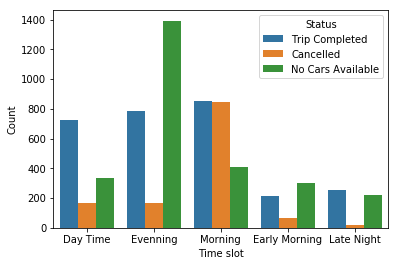

In [19]:
df['Count']=1

#we will have to change the estimated as sum, since by default the barplot takes the mean
sns.barplot(data = df, x = 'Time slot', y='Count', hue= 'Status',estimator = np.sum)



#### why dont you try what the plot will look like without estimator?

## Q10. Correct Bar
Once you have created the bar plot correctly, what major issues are you able to observe? Choose the correct options amongst the following-

a) A majority of requests in the evening are having a “No cars available” status.

b) The major issue in the morning slot is that it has a lot of cancellations.

$\color{green} {c)\,Both\, (a)\, and \,(b).}$

d) None of the above.

#### There is no code required in this question use the bar plot in the above question, the insights are obvious

## Q11. Demand Supply
Now that you’ve understood the major issues in the morning and the evening time slots, it’s time to compute the demand and supply gap. Here,

Demand - Number of Requests Uber Gets
Supply - Number of Requests Uber is able to fulfil

Demand supply gap = Demand - Supply.

Compute the demand-supply gap for both the morning and the evening slots for the Pick-up points having the most number of requests in that time_slot


$\color{green} {a)\,Morning\, - \,1205\, Evening \,-\, 1427.}$

b) Morning - 1427 Evening - 1205

c) Morning - 1249 Evening - 1558

d) Morning - 1558 Evening - 1249


In [20]:
# We make pivot table as follows
demandsupply_City=pd.pivot_table(df[df['Pickup point']=='City'], values='Count', index='Time slot', columns ='Status', aggfunc=np.sum)
#note how we modified the data while passing

#We make a new column in this pivot table 'Gap'.
#Gap will be nothing but the customers uber couldnt serve
#This is simply 'Cancelled' + 'No cars available'
demandsupply_City['Gap']=demandsupply_City['Cancelled'].add(demandsupply_City['No Cars Available'])
demandsupply_City

Status,Cancelled,No Cars Available,Trip Completed,Gap
Time slot,,,,
Day Time,104,247,395,351
Early Morning,63,151,111,214
Evenning,60,71,411,131
Late Night,19,83,115,102
Morning,820,385,472,1205


In [21]:
#we do same for Airport
demandsupply_Airport=pd.pivot_table(df[df['Pickup point']=='Airport'], values='Count', index='Time slot', columns ='Status', aggfunc=np.sum)
demandsupply_Airport['Gap']=demandsupply_Airport['Cancelled'].add(demandsupply_Airport['No Cars Available'])

demandsupply_Airport

Status,Cancelled,No Cars Available,Trip Completed,Gap
Time slot,,,,
Day Time,64,87,327,151
Early Morning,2,148,103,150
Evenning,106,1321,373,1427
Late Night,3,136,142,139
Morning,23,21,382,44


It is now easy to verify that option __(a)__ is the correct option
